## Dependencias

In [1]:
!pip install opencv-python
!pip install seaborn
!pip install matplotlib
!pip install numpy==1.26.4

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import os
import cv2
import shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Análisis

In [13]:
# Ruta del archivo de video
ruta_video = "C:/Users/Jei/Documents/Files_Editor/cropped.mp4"

# Abrir el video
video = cv2.VideoCapture(ruta_video)

if not video.isOpened():
    print("Error al abrir el archivo de video")
else:
    # Obtener el tamaño del video
    ancho = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    alto = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Obtener los FPS del video
    fps = video.get(cv2.CAP_PROP_FPS)
    
    # Imprimir el tamaño y los FPS
    print(f"Tamaño del video: {ancho}x{alto}")
    print(f"FPS del video: {fps}")

    # Liberar el video
    video.release()


Tamaño del video: 1080x1920
FPS del video: 24.0


## Frames

In [14]:
# Ruta de la carpeta donde se guardarán las imágenes
carpeta_original = "C:/Users/Jei/Documents/Files_Editor/Original"

# Crear la carpeta destino si no existe
if not os.path.exists(carpeta_original):
    os.makedirs(carpeta_original)

# Definir los FPS deseados para la conversión
fps_deseado = 24  # Cambia esto según lo necesites

# Abrir el video
video = cv2.VideoCapture(ruta_video)

if not video.isOpened():
    print("Error al abrir el archivo de video")
else:
    # Obtener los FPS del video original
    fps_original = video.get(cv2.CAP_PROP_FPS)
    
    # Calcular el intervalo entre fotogramas según los FPS deseados
    intervalo = int(round(fps_original / fps_deseado))
    
    # Contador de fotogramas
    contador_fotogramas = 0
    contador_imagenes = 0
    
    while True:
        # Leer el siguiente fotograma
        ret, fotograma = video.read()
        
        if not ret:
            break
        
        # Guardar el fotograma como imagen PNG si es el fotograma deseado
        if contador_fotogramas % intervalo == 0:
            nombre_imagen = f"frame_{contador_imagenes:04d}.png"
            ruta_imagen = os.path.join(carpeta_original, nombre_imagen)
            cv2.imwrite(ruta_imagen, fotograma)
            contador_imagenes += 1
        
        contador_fotogramas += 1
    
    print(f"Conversion completada. {contador_imagenes} imágenes guardadas en {carpeta_original}")
    
    # Liberar el video
    video.release()


Conversion completada. 75 imágenes guardadas en C:/Users/Jei/Documents/Files_Editor/Original


## Análisis keyframes

In [15]:
# Función para calcular el desenfoque de movimiento entre dos imágenes
def calcular_desenfoque(imagen_previa, imagen_siguiente):
    # Convertir las imágenes a escala de grises
    gray_previa = cv2.cvtColor(imagen_previa, cv2.COLOR_BGR2GRAY)
    gray_siguiente = cv2.cvtColor(imagen_siguiente, cv2.COLOR_BGR2GRAY)
    
    # Calcular la diferencia absoluta entre las imágenes
    diferencia = cv2.absdiff(gray_previa, gray_siguiente)
    
    # Sumar la diferencia absoluta para obtener el desenfoque de movimiento
    desenfoque = np.sum(diferencia)
    
    return desenfoque

# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = "C:/Users/Jei/Documents/Files_Editor/Original"

# Obtener la lista de imágenes en la carpeta
lista_imagenes = sorted(os.listdir(carpeta_imagenes))

# Lista para almacenar el desenfoque de movimiento de cada imagen
desenfoque_movimiento = []

# Calcular el desenfoque de movimiento para cada par de imágenes consecutivas
for i in range(1, len(lista_imagenes)):
    imagen_previa = cv2.imread(os.path.join(carpeta_imagenes, lista_imagenes[i-1]))
    imagen_siguiente = cv2.imread(os.path.join(carpeta_imagenes, lista_imagenes[i]))
    
    desenfoque = calcular_desenfoque(imagen_previa, imagen_siguiente)
    desenfoque_movimiento.append(desenfoque)

[0, 14, 20, 31, 33, 40, 52, 62, 69]


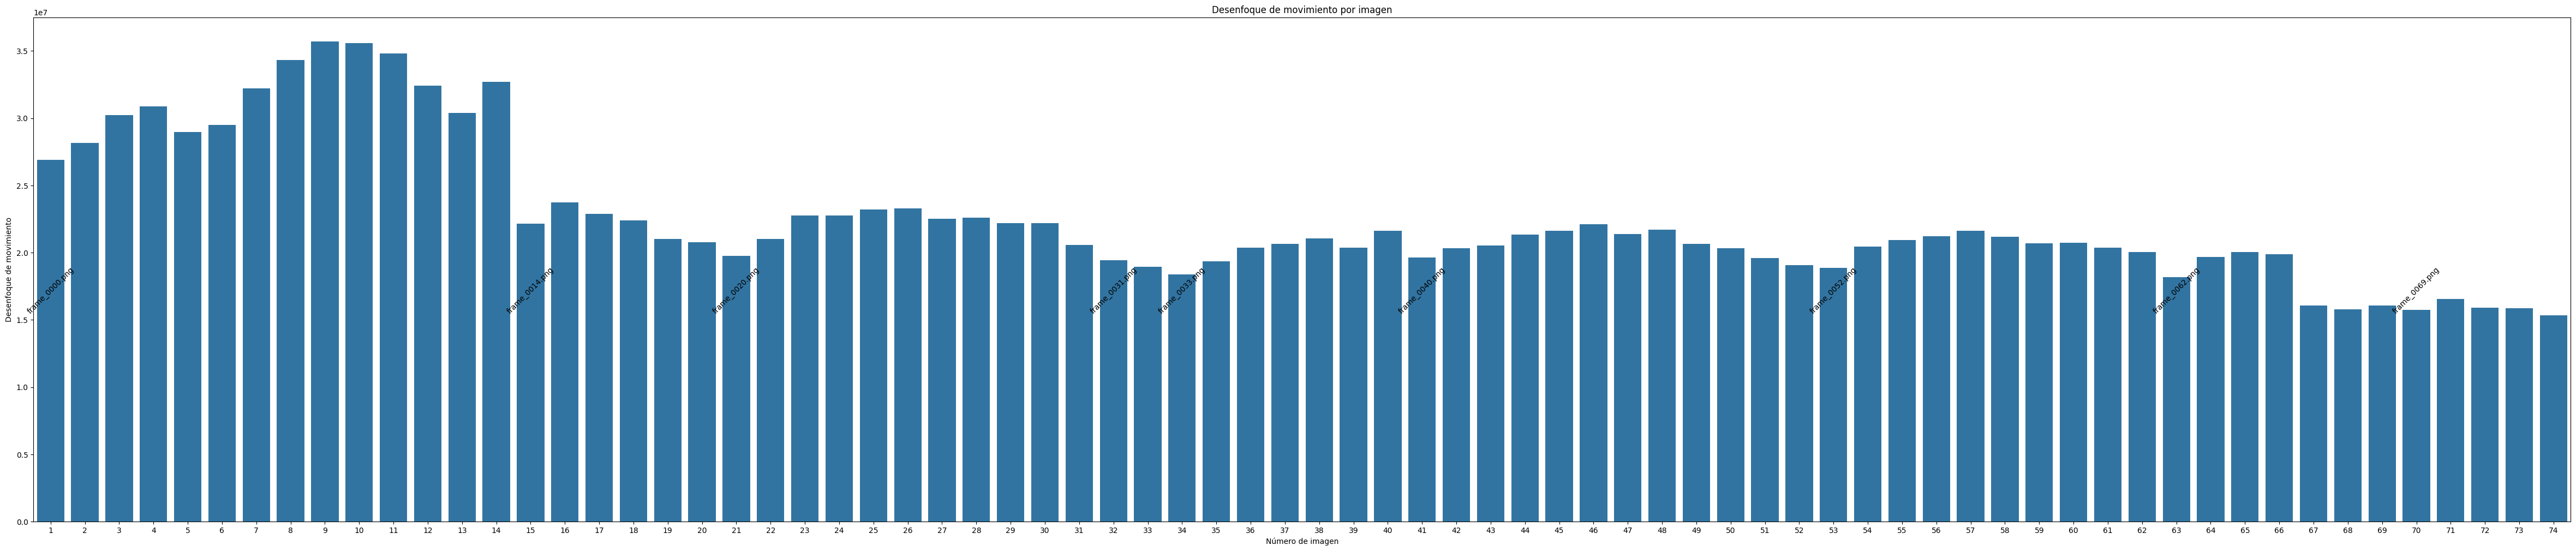

In [16]:
##### Número de intervalos
n_intervalos = 9
# Calcular el tamaño del intervalo
tamaño_intervalo = len(lista_imagenes) // n_intervalos

# Lista para almacenar el fotograma menos desenfocado de cada intervalo
fotogramas_menos_desenfocados = []

# Iterar sobre los intervalos
for i in range(n_intervalos):
    # Calcular los índices del intervalo actual
    inicio_intervalo = i * tamaño_intervalo
    fin_intervalo = (i + 1) * tamaño_intervalo
    
    # Encontrar el fotograma menos desenfocado dentro del intervalo
    fotograma_menos_desenfocado = inicio_intervalo + np.argmin(desenfoque_movimiento[inicio_intervalo:fin_intervalo])
    
    # Agregar el fotograma menos desenfocado a la lista
    fotogramas_menos_desenfocados.append(fotograma_menos_desenfocado)

# Visualizar el desenfoque de movimiento en una gráfica de barras
plt.figure(figsize=(60, 12))

# Graficar el desenfoque de movimiento original
sns.barplot(x=range(1, len(desenfoque_movimiento) + 1), y=desenfoque_movimiento)

# Añadir fotogramas menos desenfocados de cada intervalo
for fotograma in fotogramas_menos_desenfocados:
    plt.text(fotograma, min(desenfoque_movimiento), lista_imagenes[fotograma], ha='center', va='bottom', rotation=45)
print(fotogramas_menos_desenfocados)
plt.xlabel('Número de imagen')
plt.ylabel('Desenfoque de movimiento')
plt.title('Desenfoque de movimiento por imagen')
plt.show()


## Carpeta keys

In [18]:
# Crear una nueva carpeta para las imágenes seleccionadas
carpeta_seleccionadas = "C:/Users/Jei/Documents/Files_Editor/keys"
if not os.path.exists(carpeta_seleccionadas):
    os.makedirs(carpeta_seleccionadas)

# Copiar las imágenes seleccionadas a la nueva carpeta
for fotograma in fotogramas_menos_desenfocados:
    imagen_seleccionada = lista_imagenes[fotograma]
    ruta_origen = os.path.join(carpeta_imagenes, imagen_seleccionada)
    ruta_destino = os.path.join(carpeta_seleccionadas, imagen_seleccionada)
    shutil.copy2(ruta_origen, ruta_destino)

print("Keys creadas.")

Keys creadas.
